# **Setup**





In [10]:
# !git clone https://github.com/ultralytics/yolov5
!pip install --upgrade pip
!pip install -U -r yolov5/requirements.txt  # install dependencies

  Using cached pip-23.2.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Obtaining dependency information for gitpython>=3.1.30 from https://files.pythonhosted.org/packages/67/50/742c2fb60989b76ccf7302c7b1d9e26505d7054c24f08cc7ec187faaaea7/GitPython-3.1.32-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib>=3.3 from https://files.pythonhosted.org/packages/c2/da/a5622266952ab05dc3995d77689cba600e49ea9d6c51d469c077695cb719/matplotlib-3.7.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for numpy>=1.18.5 from https://files.pythonhosted.org/packages/d0/55/559e6f455a066e12058330377259a106b7fefa41c15dbdb1b71070cec429/numpy-1.25.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for Pillow>=7.1.2 from https://files.pythonhosted.org/packag

# **if torch versions are incompatible!**

In [11]:
!pip install torch torchvision -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


# **see if everything is working!**

In [12]:
%cd /kaggle/working/yolov5
!ls

/kaggle/working/yolov5
CITATION.cff	 classify   exp5	      setup.cfg       yolov5s.pt
CONTRIBUTING.md  data	    export.py	      state.db	      yolov5s_results
LICENSE		 detect.py  hubconf.py	      train.py	      yolov5s_results2
README.md	 exp	    models	      tutorial.ipynb  yolov5s_results3
README.zh-CN.md  exp2	    requirements.txt  utils
__pycache__	 exp3	    runs	      val.py
benchmarks.py	 exp4	    segment	      yolov5


# **GPU information**

In [2]:
import torch
from IPython.display import Image  # for displaying images

print('Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Using torch 2.0.0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


# **looking for data.yaml**

seeing all the classes!

In [14]:
%cd /kaggle/input/datayaml-dataset
%cat data.yaml

/kaggle/input/datayaml-dataset

train: /kaggle/input/traffic-sign-recognition/training/training/images

val: /kaggle/input/traffic-sign-recognition/valid/valid/images



nc: 12

names: ['Dont Enter','Keep Right','Max Speed 40','Max Speed 60', 'No Horn', 'No Left Turn', 'Keep Straight', 'No Right Turn', 'No U Turn', 'Parking', 'Bicycle', 'Cross Walk']


In [15]:
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [16]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [17]:
with open(r'data.yaml') as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    labels_list = yaml.load(file, Loader=yaml.FullLoader)

    label_names = labels_list['names']

# Class Information:

In [18]:
print("Number of Classes are {}, whose labels are {} for this Object Detection project".format(num_classes,label_names))

Number of Classes are 12, whose labels are ['Dont Enter', 'Keep Right', 'Max Speed 40', 'Max Speed 60', 'No Horn', 'No Left Turn', 'Keep Straight', 'No Right Turn', 'No U Turn', 'Parking', 'Bicycle', 'Cross Walk'] for this Object Detection project


In [19]:
%cat /kaggle/working/yolov5/models/yolov5s.yaml


# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: 12  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

# **Creating Model**

In [20]:
%%writetemplate /kaggle/working/yolov5/models/custom_yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, GPL-3.0 license

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]


# **Start Train**

In [23]:
%cd /kaggle/working/yolov5
!python train.py --img 360 --batch 50 --epochs 65 --data '/kaggle/input/datayaml-dataset/data.yaml' --cfg /kaggle/working/yolov5/models/custom_yolov5s.yaml --name yolov5s_results --cache --project ''

/kaggle/working/yolov5
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb

# **Start train with pretrained weight**


In [ ]:
%cd /kaggle/working/yolov5
!python train.py --img 360 --batch 50 --epochs 100 --data '/kaggle/input/datayaml-dataset/data.yaml' --cfg /kaggle/working/yolov5/models/custom_yolov5s.yaml --weights '/kaggle/working/yolov5/exp3/weights/best.pt' --cache --project ''

# **See the result for test data**

In [24]:
%cd /kaggle/working/yolov5
!python detect.py --weights '/kaggle/working/yolov5/exp3/weights/best.pt' --img 360 --conf 0.4 --source '/kaggle/input/traffic-sign-recognition/valid/valid/images'

/kaggle/working/yolov5
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")

detect: weights=['/kaggle/working/yolov5/exp3/weights/best.pt'], source=/kaggle/input/traffic-sign-recognition/valid/valid/images, data=data/coco128.yaml, imgsz=[360, 360], conf_thres=0.4, iou_thres

# **for augmentation**
  [Test-Time Augmentation (TTA)](https://docs.ultralytics.com/tutorials/test-time-augmentation/)
  
  [Transfer Learning with Frozen Layers](https://docs.ultralytics.com/tutorials/transfer-learning-froze-layers/)
  

In [ ]:
# !python val.py --img 720 --batch 50 --epochs 100 --augment --data '/content/drive/MyDrive/Colab Notebooks/Deep project/data.yaml' --cfg ./models/custom_yolov5s.yaml --weights '/content/drive/My Drive/yolov5-checkpoints/exp2/weights/best.pt' --cache --project '/content/drive/MyDrive/Colab Notebooks/Deep project/resume'

# **See chart of improvement in trainig**

In [14]:
!kill 122

In [15]:
%load_ext tensorboard
%tensorboard --logdir '/kaggle/working/yolov5/exp3'

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


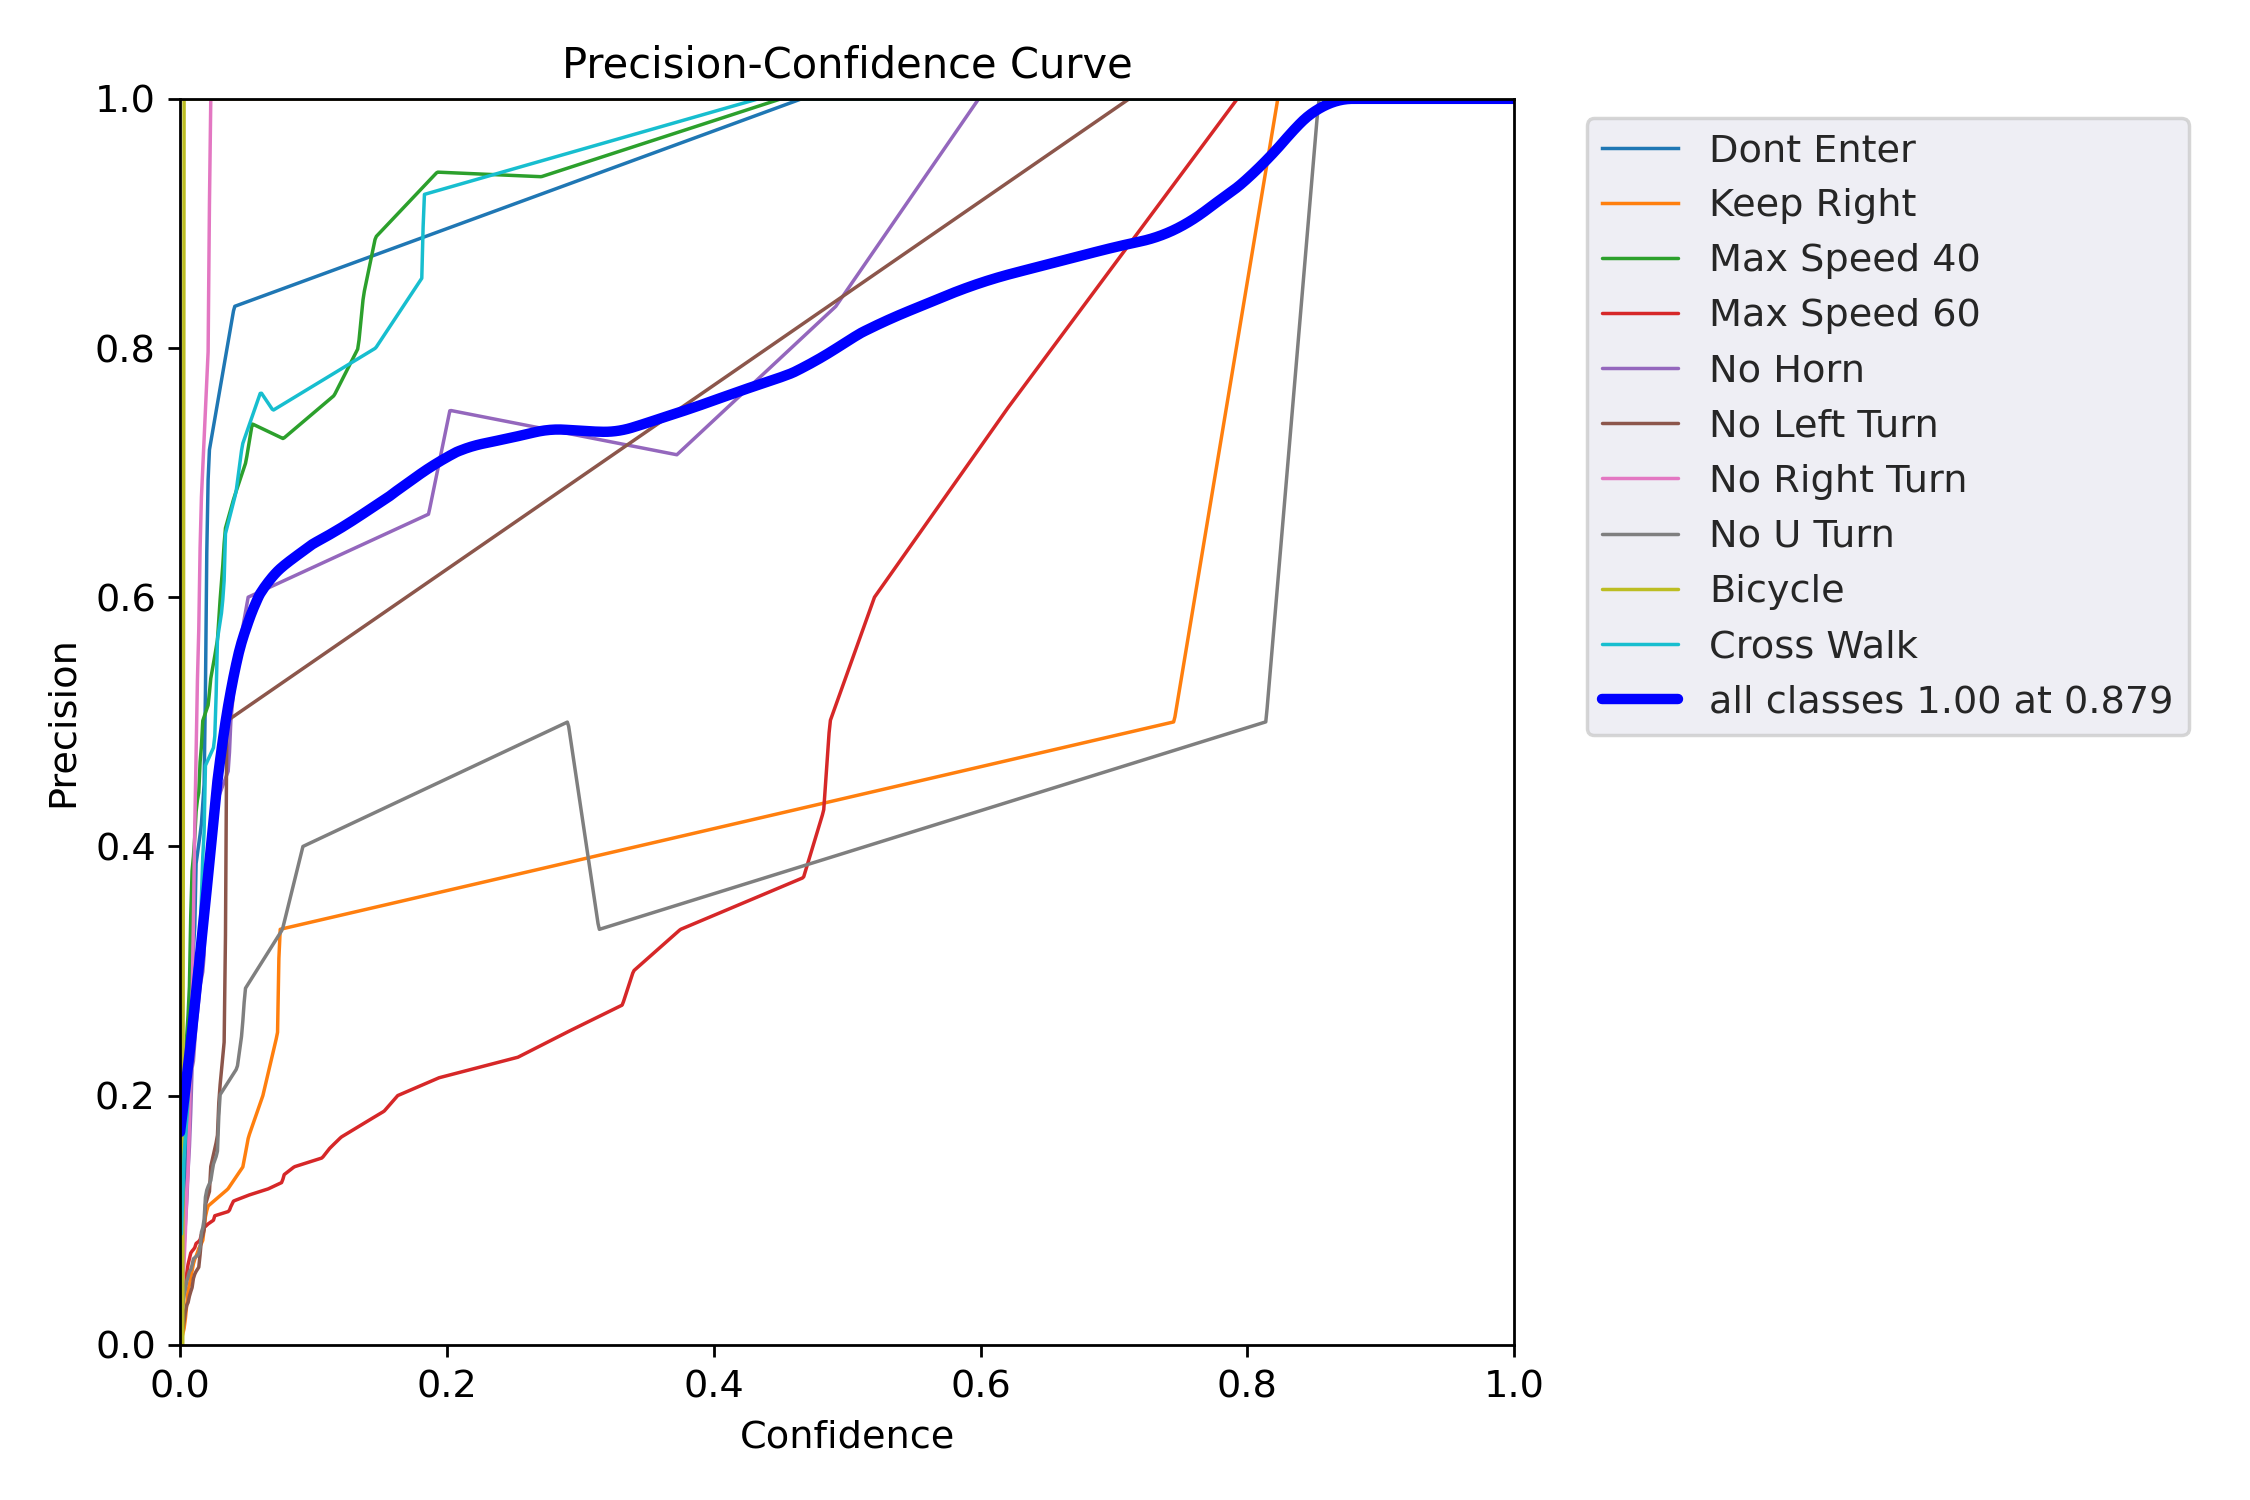

In [4]:
Image(filename='/kaggle/working/yolov5/exp3/P_curve.png', width=900)

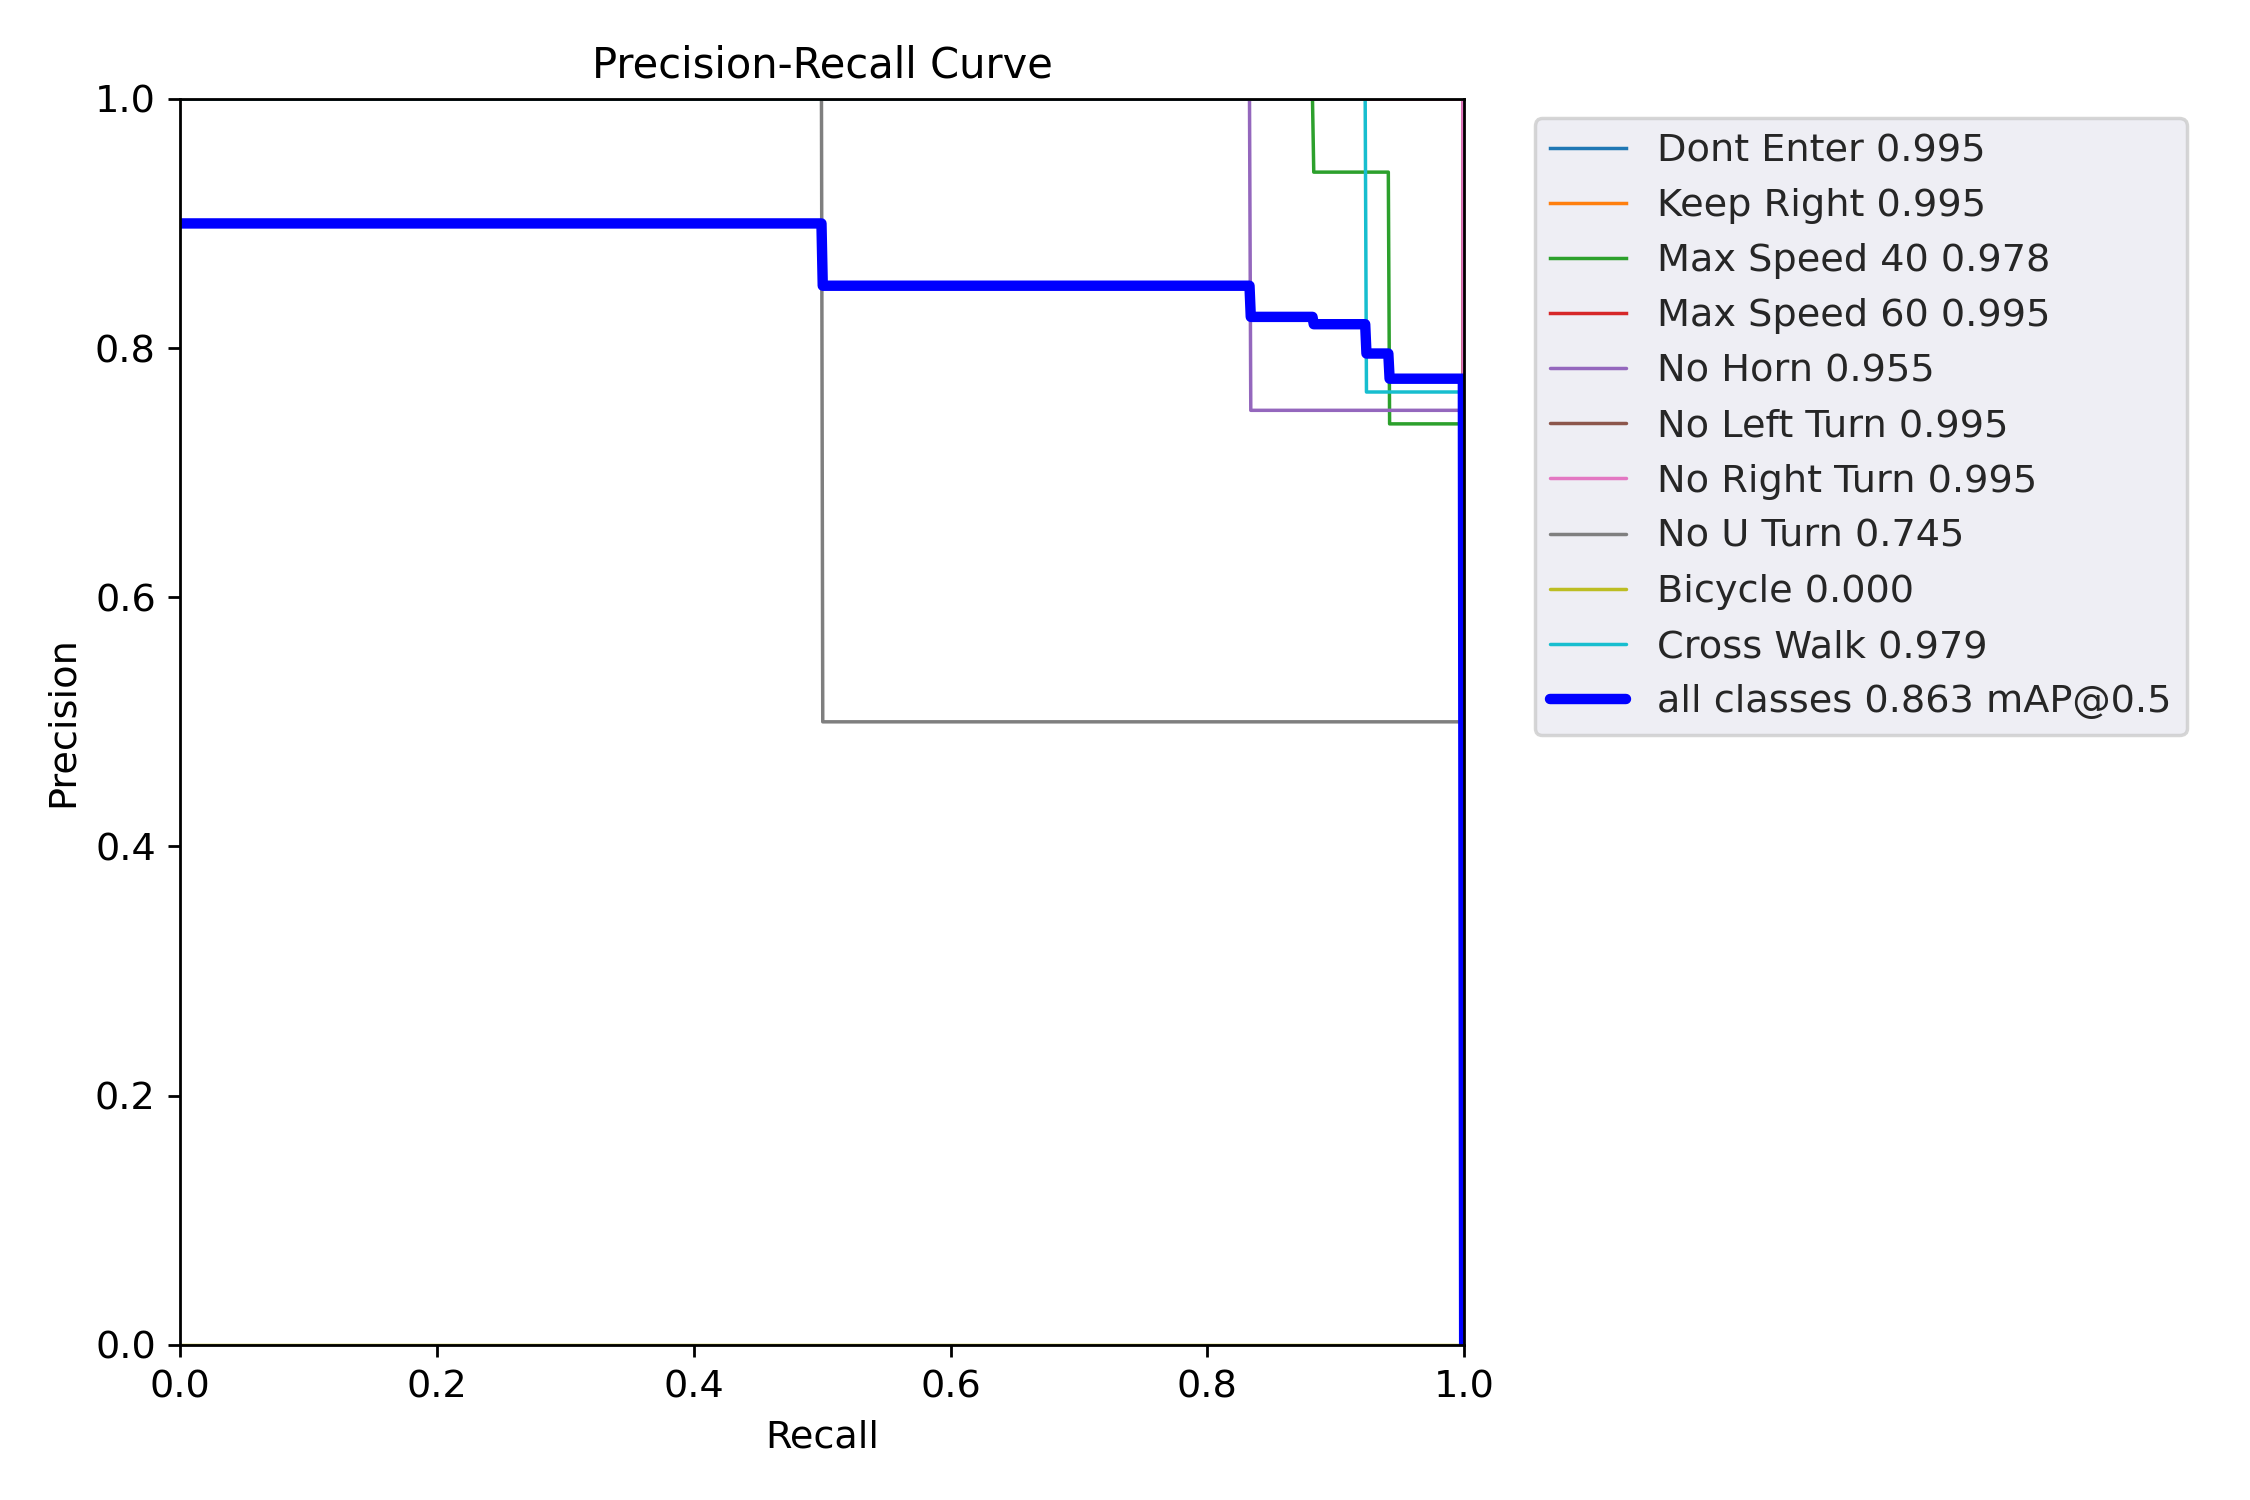

In [5]:
Image(filename='/kaggle/working/yolov5/exp3/PR_curve.png', width=900)

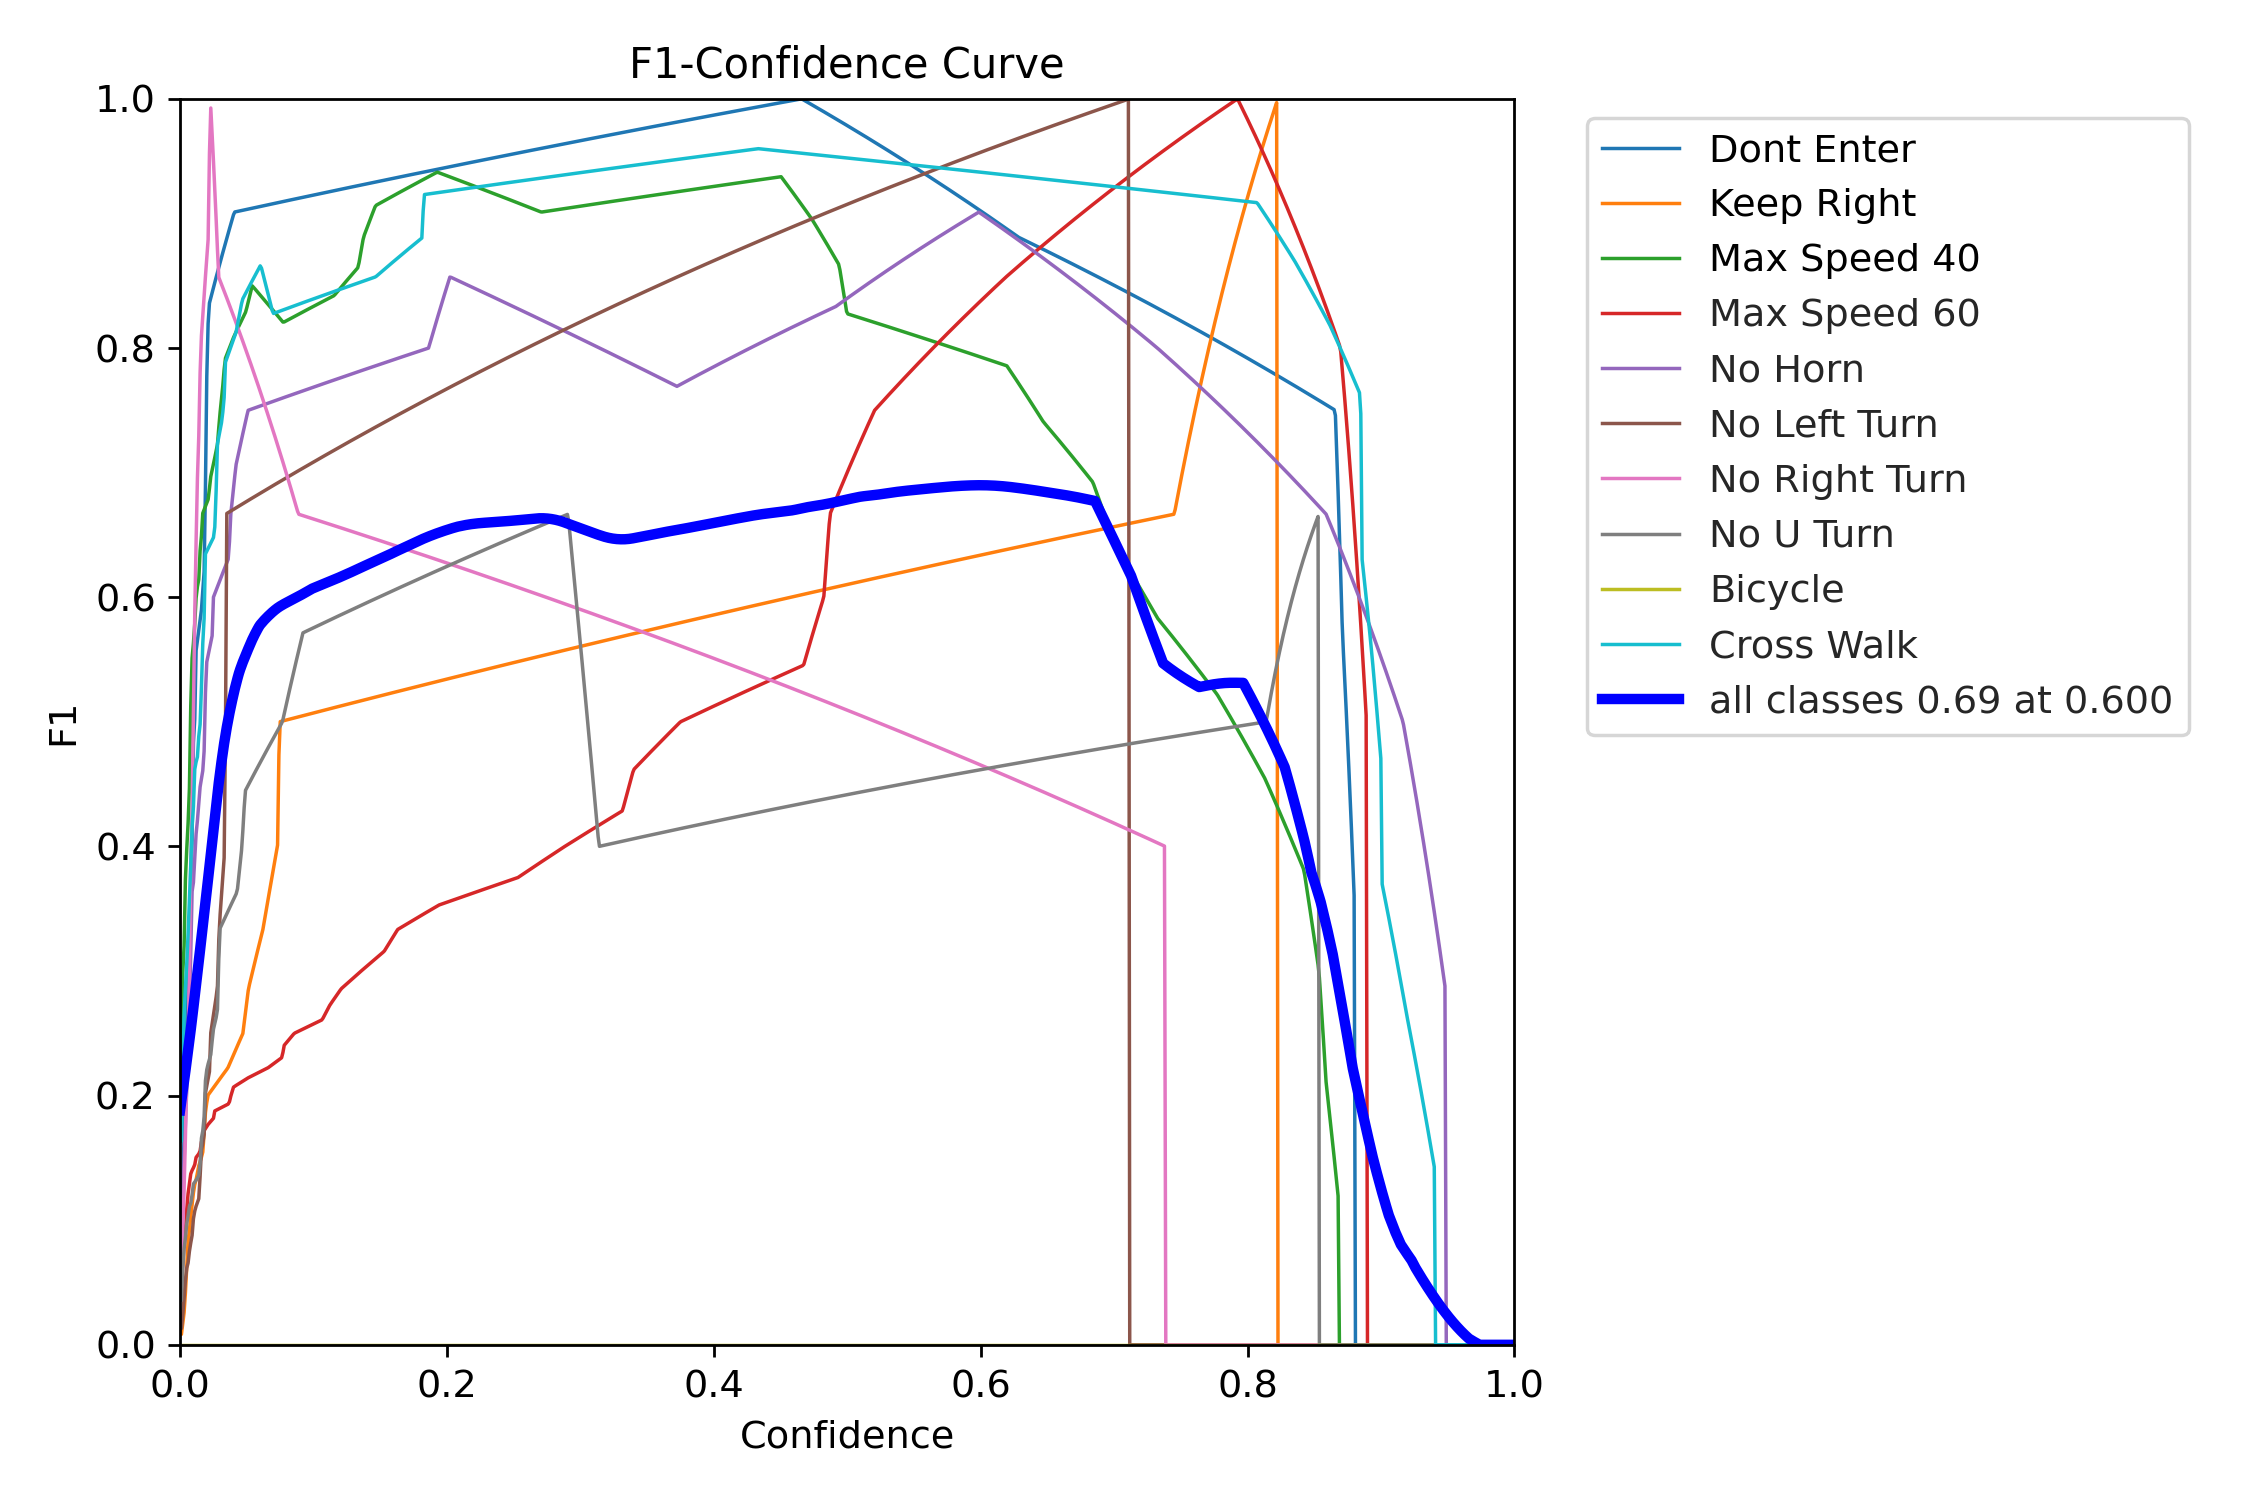

In [7]:
Image(filename='/kaggle/working/yolov5/exp3/F1_curve.png', width=900)

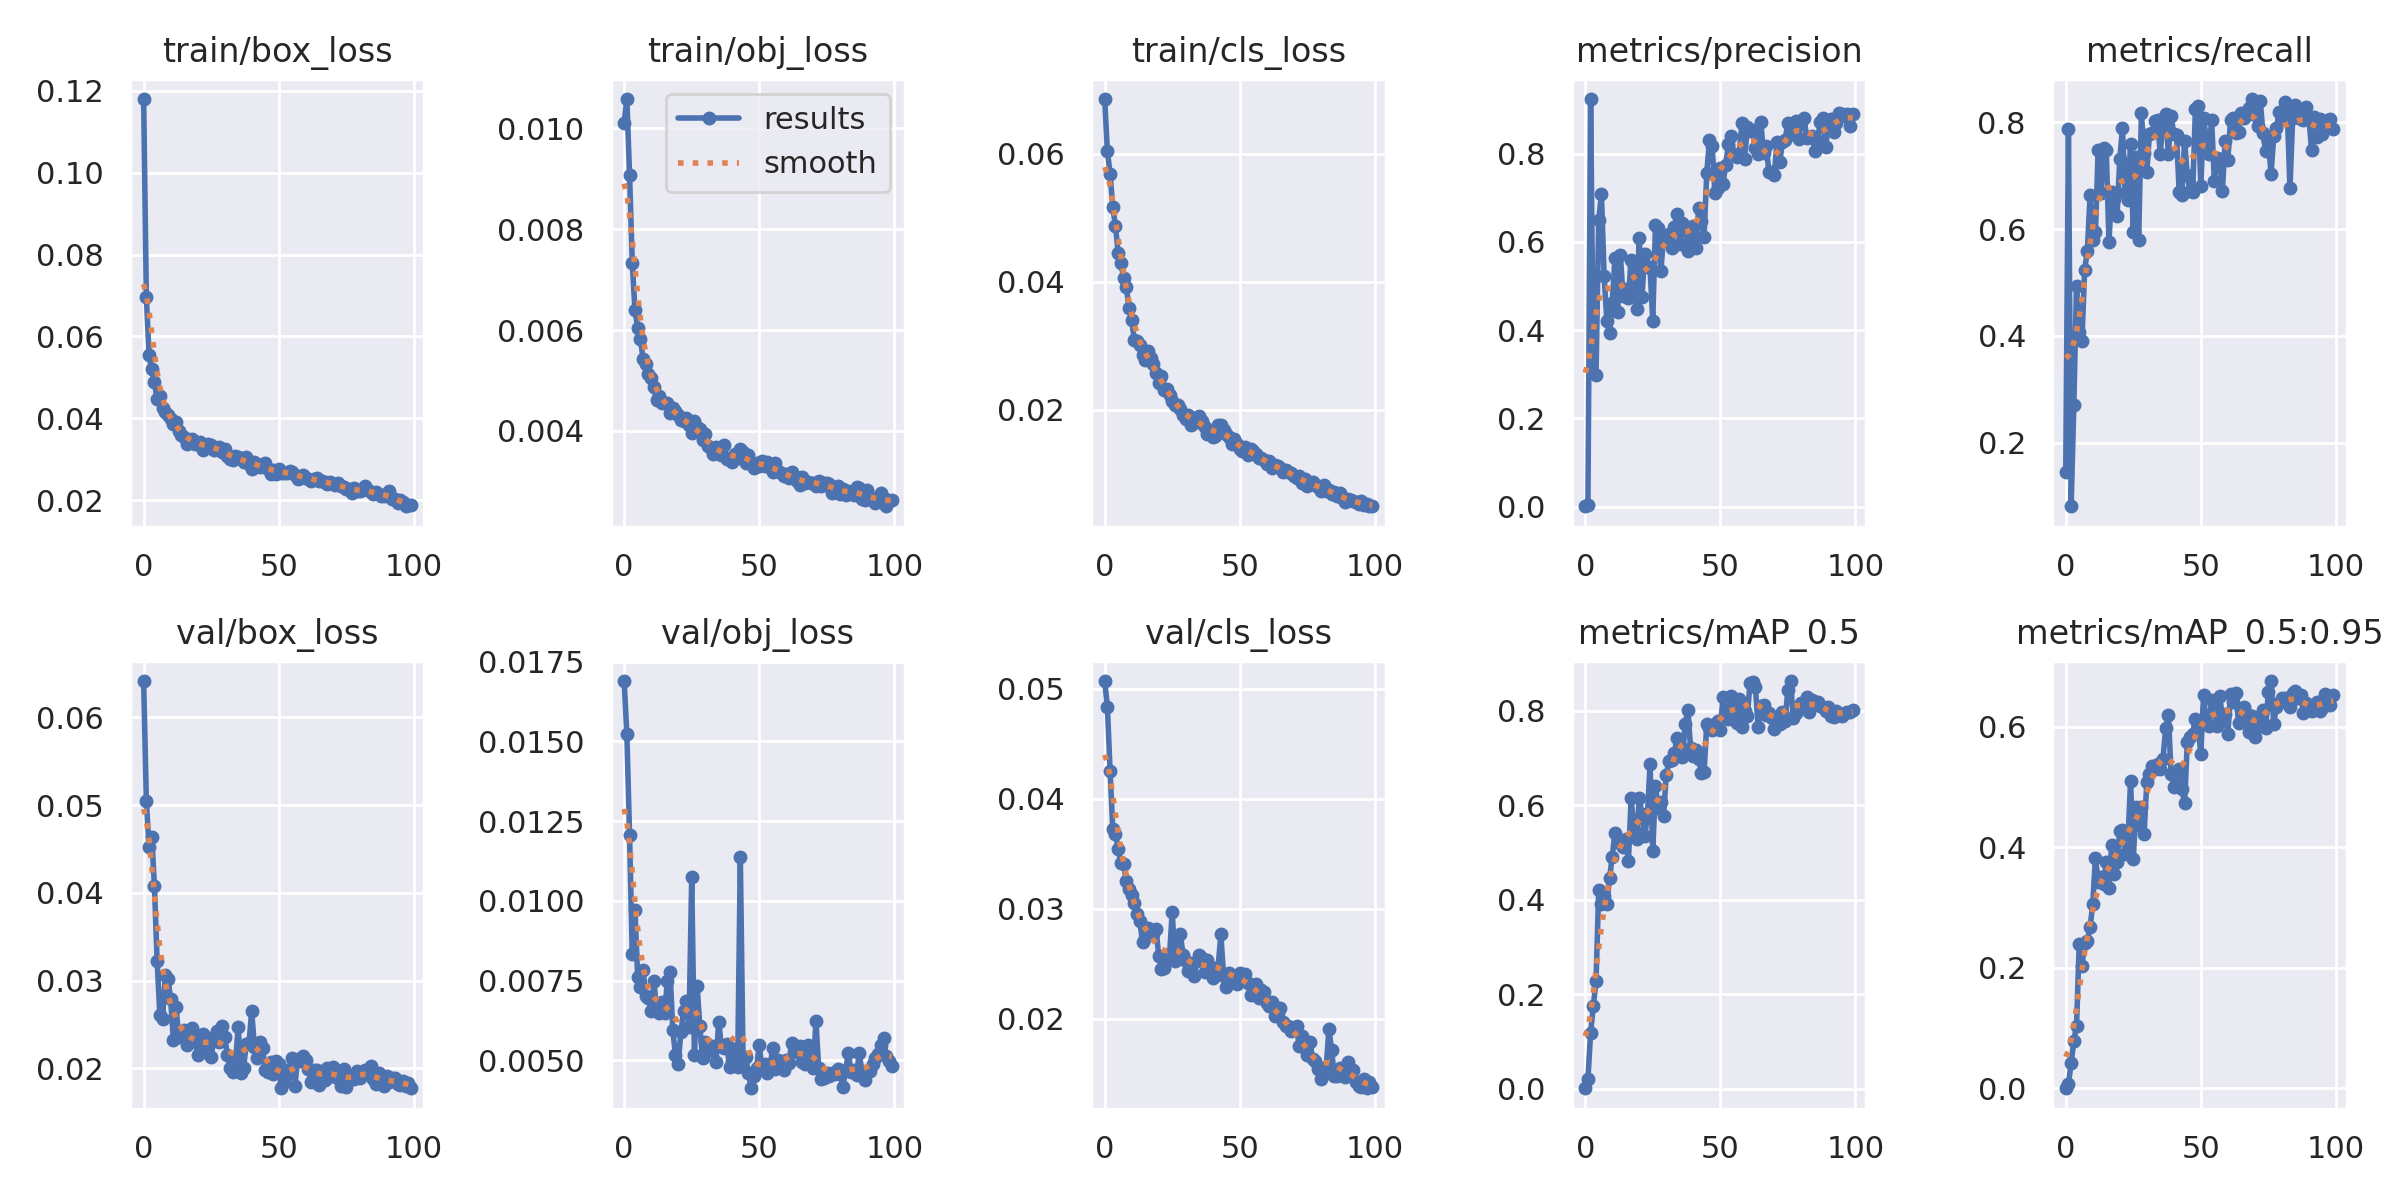

In [8]:
Image(filename='/kaggle/working/yolov5/exp3/results.png', width=900)

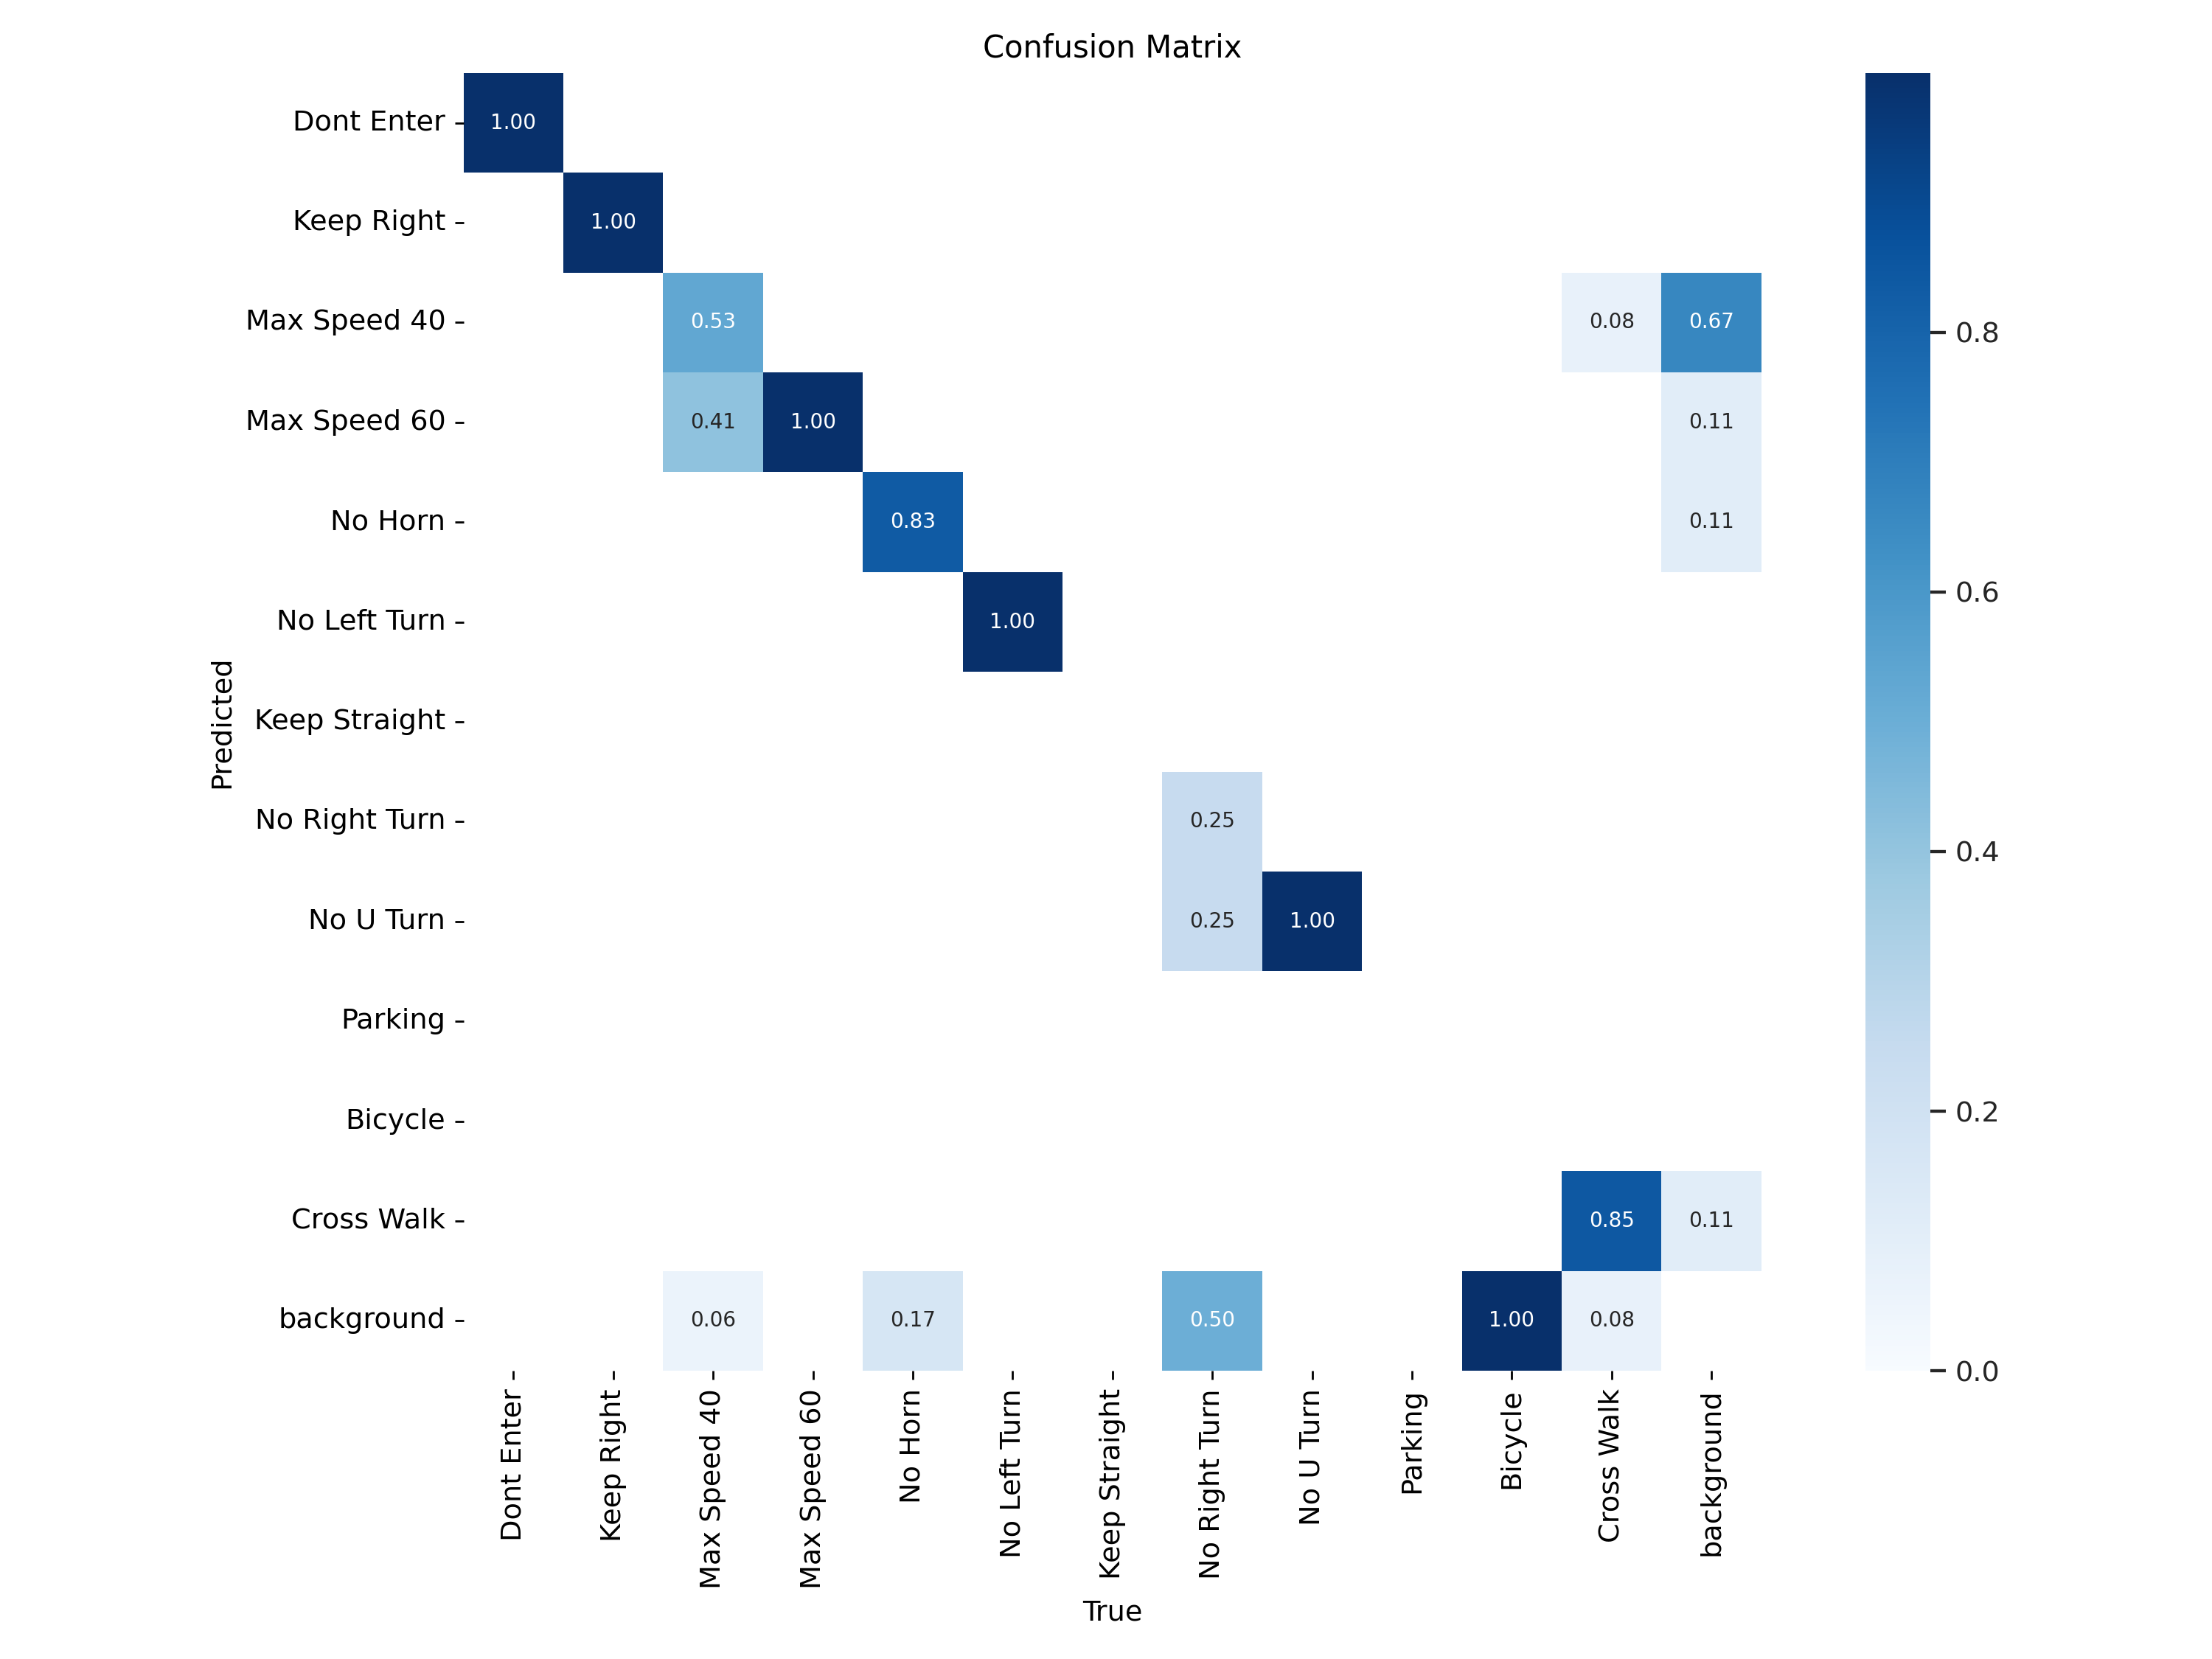

In [10]:
Image(filename='/kaggle/working/yolov5/exp3/confusion_matrix.png', width=900)

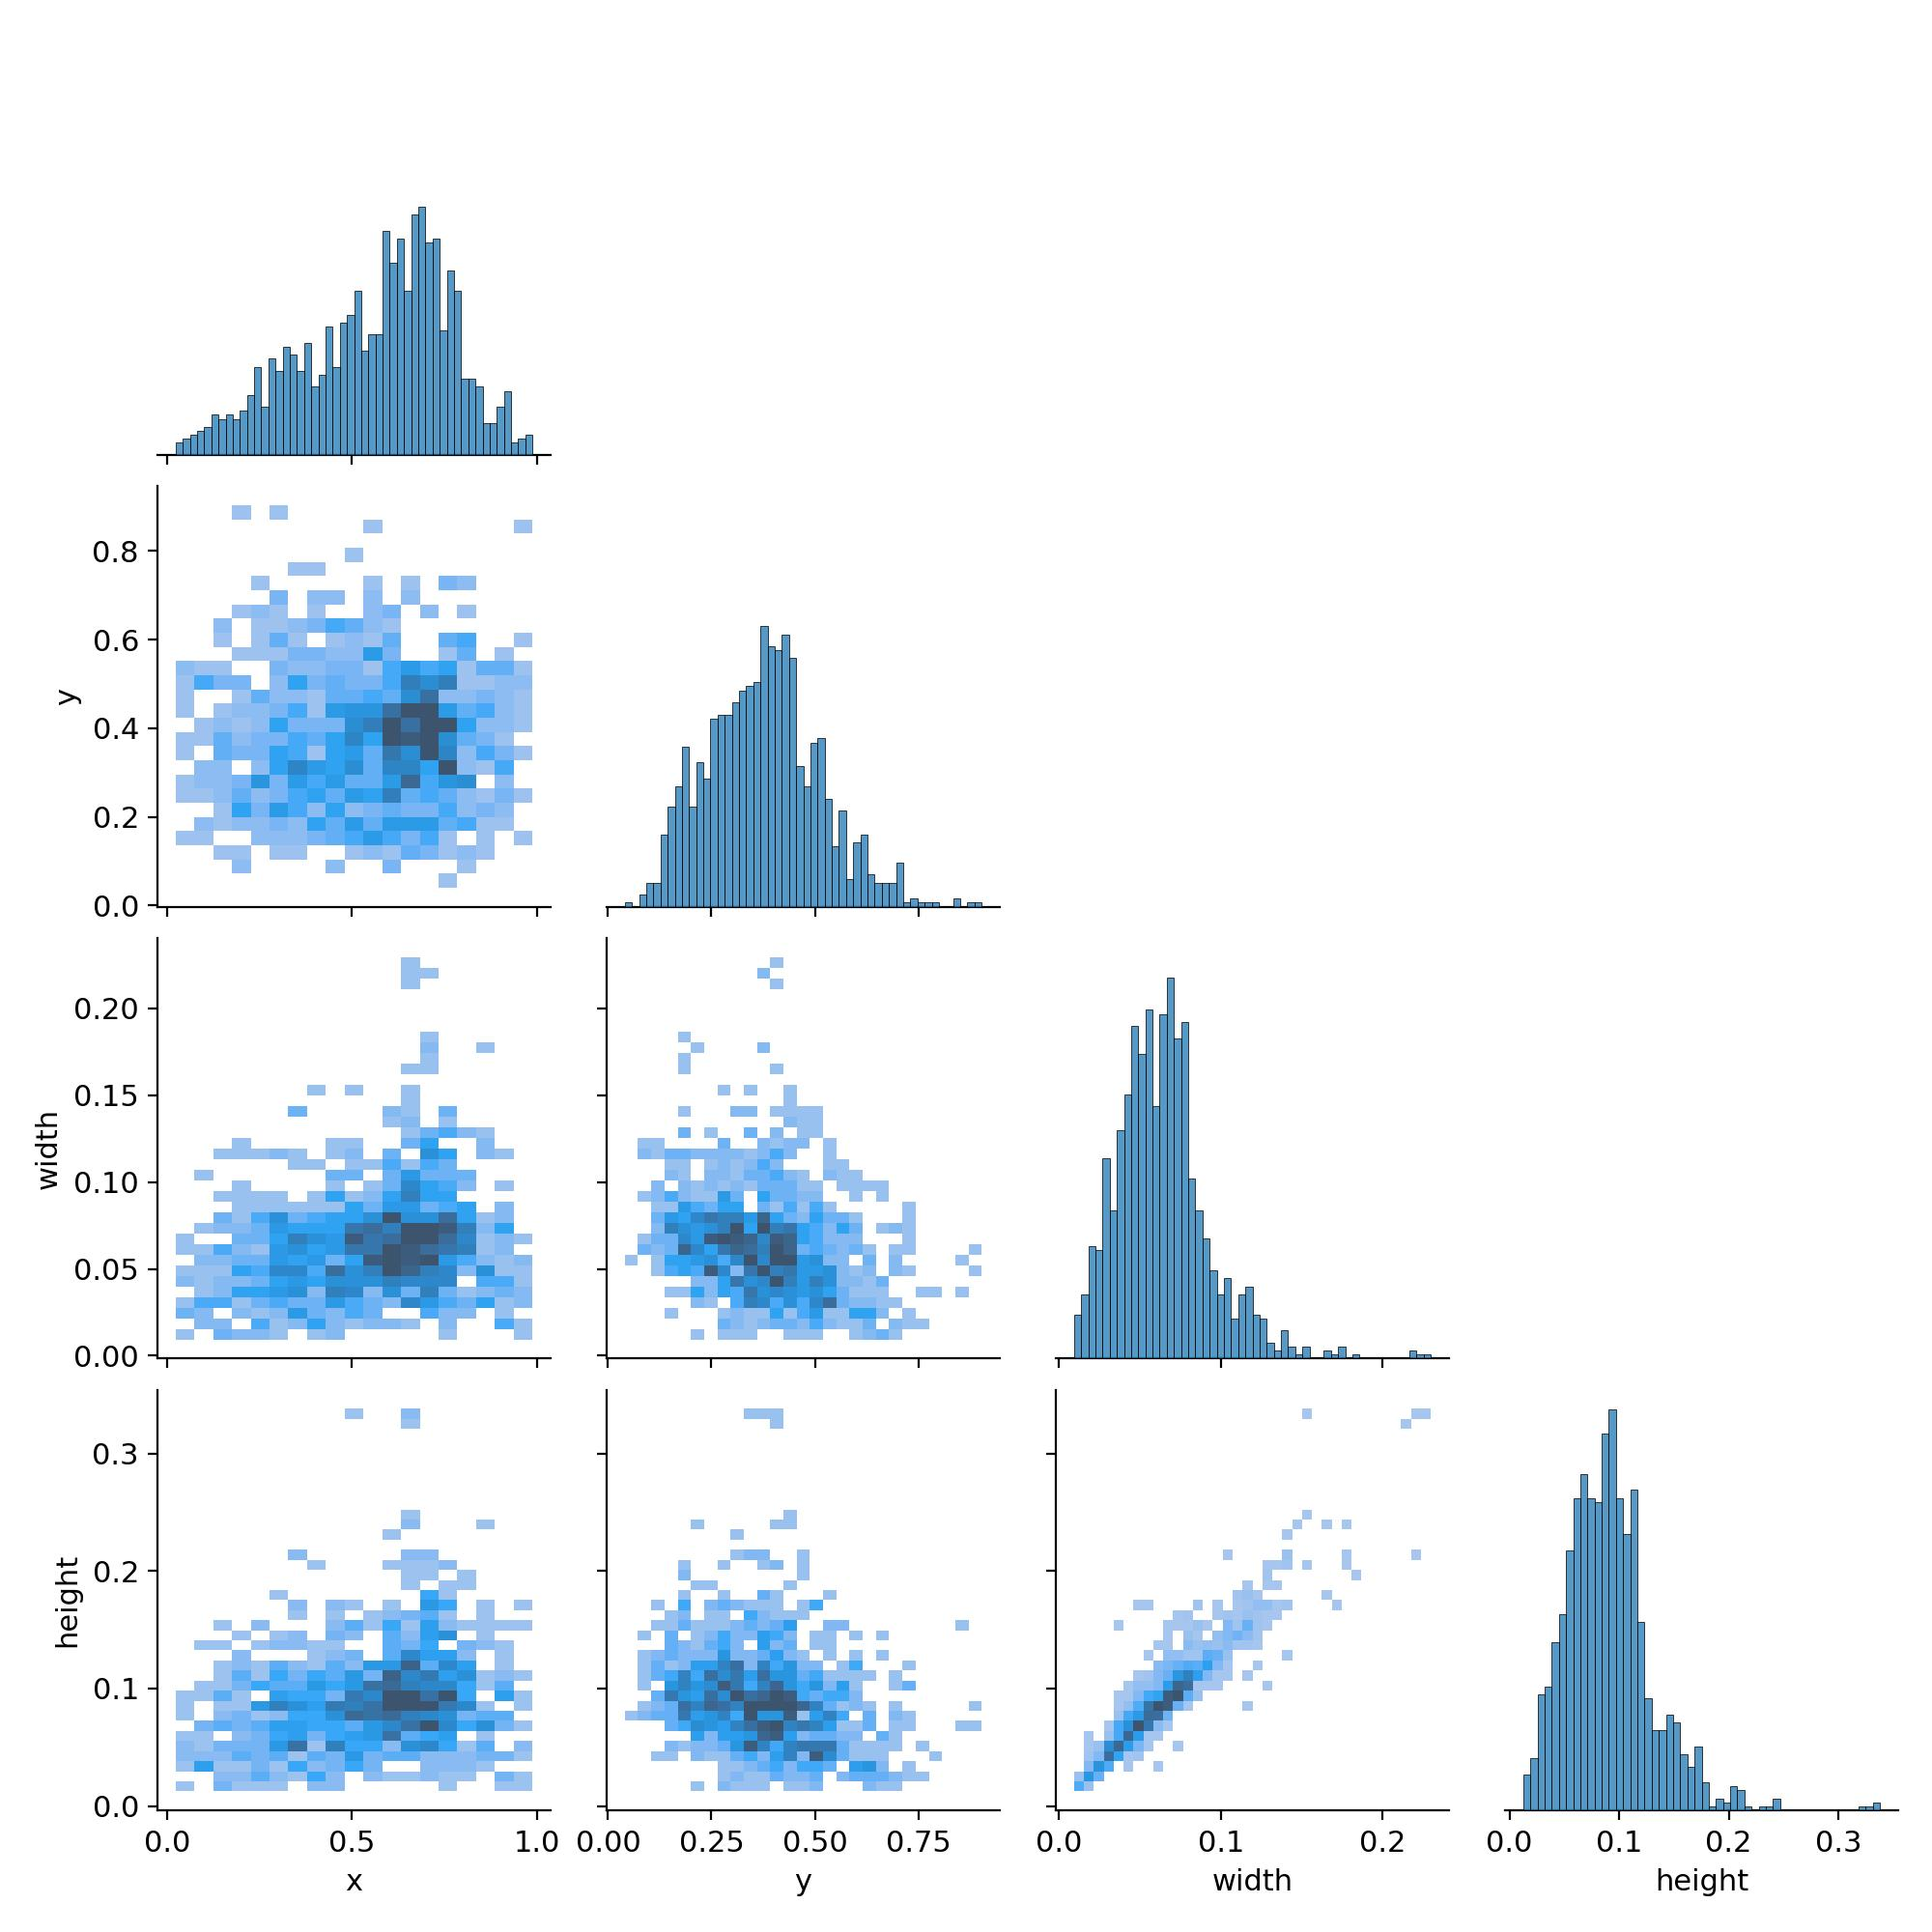

In [12]:
Image(filename='/kaggle/working/yolov5/exp3/labels_correlogram.jpg', width=900)